# 📊 Análisis descriptivo 

En este primer informe se realizará un análisis detallado a las dudas que planteó Maria Dolores para la reunión de hoy:

In [11]:
import pandas as pd
import xlsxwriter
import utils
# ===============================
# LEER EL ARCHIVO LIMPIO
# ===============================
dfs = pd.read_excel(r'..\datos\01. Datos originales\DataSET_SF.xlsx', sheet_name=None)

# Ver la primera hoja
oportunidad = list(dfs.values())[0]
cuenta = list(dfs.values())[1]
ecb = list(dfs.values())[2]
solicitud_ban = list(dfs.values())[3]
casos = list(dfs.values())[4]
correos = list(dfs.values())[5]
historial_actividad = list(dfs.values())[6]
historial_etapas = list(dfs.values())[7]


print(historial_etapas.head())

KeyboardInterrupt: 

In [ ]:
from utils import analisis_na_por_columna, eliminar_columnas_na, crear_target


# ===============================
# LIMPIEZA DE NAS
# ===============================

oportunidad = eliminar_columnas_na(oportunidad)
cuenta = eliminar_columnas_na(cuenta)
ecb = eliminar_columnas_na(ecb)
solicitud_ban = eliminar_columnas_na(solicitud_ban)
casos = eliminar_columnas_na(casos)
correos = eliminar_columnas_na(correos)
historial_actvidad = eliminar_columnas_na(historial_actividad)
historial_etapas = eliminar_columnas_na(historial_etapas)

# ===============================
# CREACION DEL TARJET
# ===============================

target = crear_target(oportunidad, historial_etapas)
target.head()




Hay un total de 15447 matrículas formalizadas. Un 25.79% del total de oportunidades
Hay un total de 1492 desmatriculados. Un 9.66% del total de matriculados


,ID,ACCOUNTID,PL_CURSO_ACADEMICO,PL_TIPO_ACCESO,RECORDTYPEID,RECORDTYPENAME,PL_ESTADO,STAGENAME,PL_SUBETAPA,CH_SIMULTANEIDAD,...,CH_CONDITIONED,CH_SOLICITA_ALOJAMIENTO,NOCONTABILIZABLE,PL_MODALIDAD_EXAMEN_ACCESO_ESC,KITDEVISADO,NU_PASOMAX,NU_PASO_SOLICITUD_ADMISION,CH_ACEPTO_CONDICIONES_MATRICUL,PL_DOMICILIO_DURANTE_CURSO,target
0,0061r00001KLSSJAA5,0011r00002YMDC6AAP,2022/2023,Acceso a primero,012w0000000K4QPAA0,Solicitud Admisión Grado,Validado,Reorientación,Respuesta candidato,false,...,False,False,False,Online,False,1.0,10.0,False,NaN,0
1,0066900001W1pVKAAZ,0016900002mntULAAY,2022/2023,Acceso a primero,012w0000000K4QPAA0,Solicitud Admisión Grado,Pendiente de validar,Cerrada/Perdida,NaN,false,...,False,False,False,Presencial,False,3.0,6.0,False,NaN,0
2,0066900001cHyR5AAK,0016900002vnx7kAAA,2022/2023,Acceso a primero,012w0000000K4QTAA0,Solicitud Matricula Grado,Pendiente de validar,Matrícula OOGG,Formalizada,false,...,False,False,False,Online,False,9.0,9.0,False,5.0,1
3,0066900001MevZwAAJ,0016900002aNZZuAAO,2022/2023,Acceso a primero,012w0000000K4QPAA0,Solicitud Admisión Grado,Validado,Pruebas de admisión,No presentado,false,...,False,False,False,Presencial,False,1.0,10.0,False,NaN,0
4,0066900001VzuaIAAR,0016900002jiFCfAAM,2022/2023,Acceso a primero,012w0000000K4QTAA0,Solicitud Matricula Grado,Pendiente de validar,Matrícula OOGG,Formalizada,false,...,False,False,False,Presencial,False,9.0,9.0,False,1.0,1


In [ ]:
import pandas as pd

# Diccionario para organizar los DataFrames y sus nombres de pestaña
dataframes_dict = {
    'Oportunidad': oportunidad,
    'Cuenta': cuenta,
    'ECB': ecb,
    'Solicitud_BAN': solicitud_ban,
    'Casos': casos,
    'Correos': correos,
    'Historial_Actividad': historial_actvidad,
    'Historial_Etapas': historial_etapas,
    'Target': target
}

# Guardado en Excel
file_path = 'Datos_Procesados_UNAV.xlsx'

with pd.ExcelWriter(file_path, engine='xlsxwriter') as writer:
    for sheet_name, df in dataframes_dict.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)
        print(f"Pestaña '{sheet_name}' guardada correctamente.")

print(f"\n✅ Archivo Excel creado en: {file_path}")

Pestaña 'Oportunidad' guardada correctamente.
Pestaña 'Cuenta' guardada correctamente.
Pestaña 'ECB' guardada correctamente.
Pestaña 'Solicitud_BAN' guardada correctamente.
Pestaña 'Casos' guardada correctamente.
Pestaña 'Correos' guardada correctamente.
Pestaña 'Historial_Actividad' guardada correctamente.
Pestaña 'Historial_Etapas' guardada correctamente.
Pestaña 'Target' guardada correctamente.

✅ Archivo Excel creado en: Datos_Procesados_UNAV.xlsx


# Análisis descriptivo (Seguimiento 1)

En primer lugar se analizan el número de oportunidades por curso académico, origen de la solicitud (Solicitud Admisión, Solicitud de Matrícula) distinguiendo por los Matriculados (1) y los No Matriculados (0)

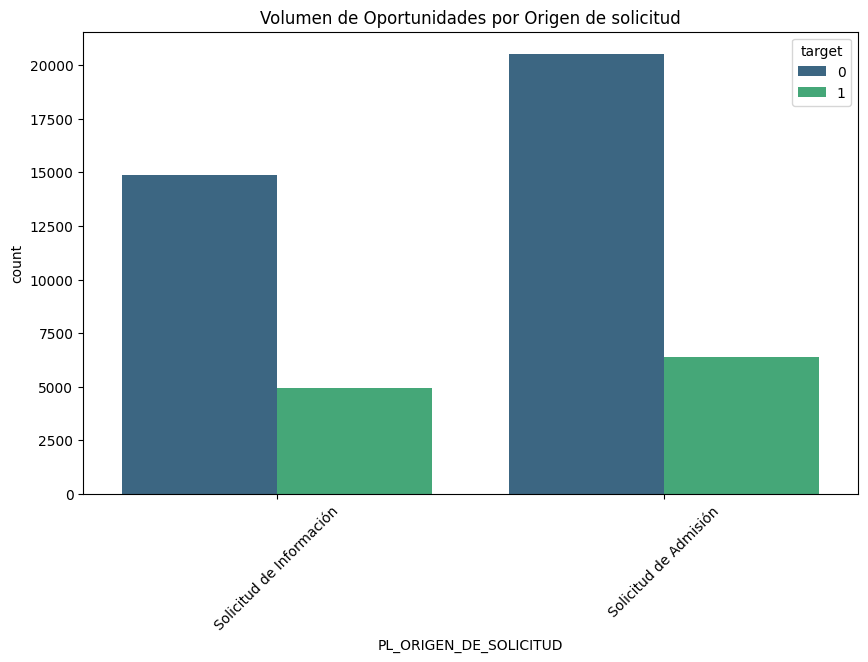

No Matriculado (0)  \
PL_CURSO_ACADEMICO PL_ORIGEN_DE_SOLICITUD                         
2022/2023          Solicitud de Admisión                   2884   
                   Solicitud de Información                2148   
2023/2024          Solicitud de Admisión                   2539   
                   Solicitud de Información                1794   
2024/2025          Solicitud de Admisión                   5083   
                   Solicitud de Información                3965   
2025/2026          Solicitud de Admisión                   5157   
                   Solicitud de Información                3622   
2026/2027          Solicitud de Admisión                   4873   
                   Solicitud de Información                3352   

                                             Matriculado (1)  Total  \
PL_CURSO_ACADEMICO PL_ORIGEN_DE_SOLICITUD                             
2022/2023          Solicitud de Admisión                1579   4463   
                   Solicitud de Información             1359   3507   
2023/2024          Solicitud de Admisión                 911   3450   
                   Solicitud de Información              604   2398   
2024/2025          Solicitud de Admisión                1824   6907   
                   Solicitud de Información             1410   5375   
2025/2026          Solicitud de Admisión                2057   7214   
                   Solicitud de Información             1567   5189   
2026/2027          Solicitud de Admisión                   0   4873   
                   Solicitud de Información                0   3352   

                                             % Fidelidad  
PL_CURSO_ACADEMICO PL_ORIGEN_DE_SOLICITUD                 
2022/2023          Solicitud de Admisión           35.38  
                   Solicitud de Información        38.75  
2023/2024          Solicitud de Admisión           26.41  
                   Solicitud de Información        25.19  
2024/2025          Solicitud de Admisión           26.41  
                   Solicitud de Información        26.23  
2025/2026          Solicitud de Admisión           28.51  
                   Solicitud de Información        30.20  
2026/2027          Solicitud de Admisión            0.00  
                   Solicitud de Información         0.00

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Resumen numérico con cálculo de porcentaje
resumen_acceso = target.groupby(['PL_CURSO_ACADEMICO', 'PL_ORIGEN_DE_SOLICITUD', 'target'])['ID'].nunique().unstack(fill_value=0)
resumen_acceso.columns = ['No Matriculado (0)', 'Matriculado (1)']

# Calcular Total y % de Matriculados (Tasa de Conversión/Fidelidad)
resumen_acceso['Total'] = resumen_acceso['No Matriculado (0)'] + resumen_acceso['Matriculado (1)']
resumen_acceso['% Fidelidad'] = (resumen_acceso['Matriculado (1)'] / resumen_acceso['Total'] * 100).round(2)


# Gráfico Global de Acceso
plt.figure(figsize=(10, 6))
sns.countplot(data=target.drop_duplicates('ID'), x='PL_ORIGEN_DE_SOLICITUD', hue='target', palette='viridis')
plt.title('Volumen de Oportunidades por Origen de solicitud')
plt.xticks(rotation=45)
plt.show()
resumen_acceso

Ahora se comprueba el top de titulaciones por origen de solicitud distinguiendo entre Matriculados (1) y No Matriculados (0)

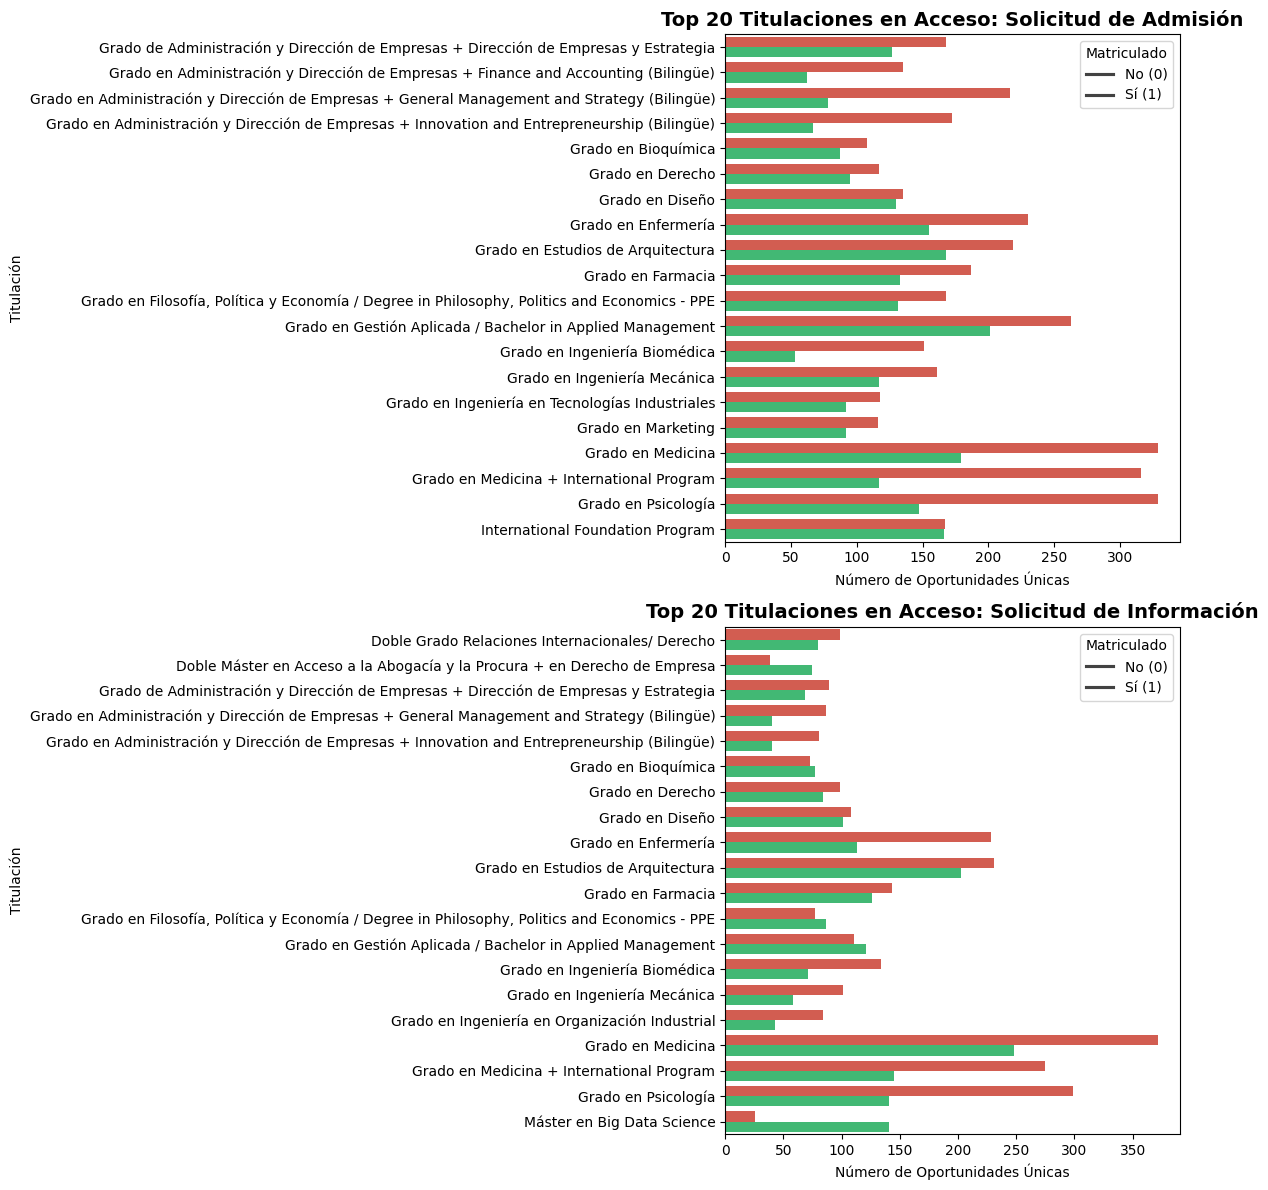

In [ ]:
def graficar_top_por_acceso(df, top_n=5):
    # 1. Agrupar y contar oportunidades únicas
    df_counts = df.groupby(['PL_ORIGEN_DE_SOLICITUD', 'TITULACION_DEF', 'target'])['ID'].nunique().reset_index()
    df_counts.columns = ['Acceso', 'Titulación', 'Target', 'Oportunidades']

    # 2. Obtener los tipos de acceso únicos
    accesos = df_counts['Acceso'].unique()
    
    # 3. Crear una figura con subplots (uno por cada tipo de acceso)
    fig, axes = plt.subplots(len(accesos), 1, figsize=(12, 6 * len(accesos)))
    if len(accesos) == 1: axes = [axes] # Manejo de caso con un solo acceso

    for i, acceso in enumerate(accesos):
        # Filtrar datos por acceso y coger las N titulaciones con más volumen total
        data_acceso = df_counts[df_counts['Acceso'] == acceso]
        top_titulaciones = data_acceso.groupby('Titulación')['Oportunidades'].sum().nlargest(top_n).index
        data_top = data_acceso[data_acceso['Titulación'].isin(top_titulaciones)]

        # Pintar en el subplot correspondiente
        sns.barplot(
            ax=axes[i],
            data=data_top,
            y='Titulación',
            x='Oportunidades',
            hue='Target',
            palette={0: '#e74c3c', 1: '#2ecc71'} # Rojo para No, Verde para Sí
        )
        axes[i].set_title(f'Top {top_n} Titulaciones en Acceso: {acceso}', fontsize=14, fontweight='bold')
        axes[i].set_xlabel('Número de Oportunidades Únicas')
        axes[i].legend(title='Matriculado', labels=['No (0)', 'Sí (1)'])

    plt.tight_layout()
    plt.show()
# Ejecución
graficar_top_por_acceso(target, top_n=20)

Reescribir y crear el dataset nuevo completamente optimizado

In [18]:
import pandas as pd

def generar_resumen_detallado_fidelidad(df):
    print("Generando resumen detallado por curso y titulación...")
    
    # 1. Agrupación por las tres dimensiones y el target
    # Usamos nunique('ID') para asegurar que contamos oportunidades únicas
    resumen = df.groupby(
        ['PL_ORIGEN_DE_SOLICITUD', 'TITULACION_DEF', 'target']
    )['ID'].nunique().unstack(fill_value=0)
    
    # 2. Renombrar columnas para claridad
    # El unstack genera columnas 0 y 1 basadas en el valor del target
    resumen.columns = ['No Matriculados', 'Matriculados']
    
    # 3. Calcular métricas adicionales
    resumen['Total Oportunidades'] = resumen['No Matriculados'] + resumen['Matriculados']
    
    # Calculamos el porcentaje de matriculados sobre el total (Tasa de Fidelidad)
    resumen['% Conversión'] = (resumen['Matriculados'] / resumen['Total Oportunidades'] * 100).round(2)
    
    # 4. Ordenar para identificar rápidamente los puntos críticos (mayor volumen primero)
    resumen = resumen.sort_values(
        by=['Total Oportunidades'], 
        ascending=[False]
    )
    
    return resumen

# Ejecución del resumen
df_resumen_final = generar_resumen_detallado_fidelidad(target)

# Mostrar los primeros resultados para verificar
df_resumen_final

# Opcional: Guardar a Excel para llevarlo a la reunión
# df_resumen_final.to_excel("Resumen_Fidelidad_UNAV.xlsx")

Generando resumen detallado por curso y titulación...


No Matriculados  \
PL_ORIGEN_DE_SOLICITUD   TITULACION_DEF                                                        
Solicitud de Información Grado en Medicina                                               372   
Solicitud de Admisión    Grado en Medicina                                               329   
                         Grado en Psicología                                             329   
                         Grado en Gestión Aplicada / Bachelor in Applied...              263   
Solicitud de Información Grado en Psicología                                             299   
...                                                                                      ...   
Solicitud de Admisión    Licentia in Theologia. Especialidad en Teología...                1   
Solicitud de Información Doble Grado Historia/ Periodismo (+ Internation...                1   
Solicitud de Admisión    Bachiller en Sagrada Teología                                     1   
                         Licentia in Theologia, Especialidad en Teología...                0   
Solicitud de Información Grado en Historia y Diploma en Arqueología + In...                0   

                                                                             Matriculados  \
PL_ORIGEN_DE_SOLICITUD   TITULACION_DEF                                                     
Solicitud de Información Grado en Medicina                                            248   
Solicitud de Admisión    Grado en Medicina                                            179   
                         Grado en Psicología                                          147   
                         Grado en Gestión Aplicada / Bachelor in Applied...           201   
Solicitud de Información Grado en Psicología                                          141   
...                                                                                   ...   
Solicitud de Admisión    Licentia in Theologia. Especialidad en Teología...             0   
Solicitud de Información Doble Grado Historia/ Periodismo (+ Internation...             0   
Solicitud de Admisión    Bachiller en Sagrada Teología                                  0   
                         Licentia in Theologia, Especialidad en Teología...             1   
Solicitud de Información Grado en Historia y Diploma en Arqueología + In...             1   

                                                                             Total Oportunidades  \
PL_ORIGEN_DE_SOLICITUD   TITULACION_DEF                                                            
Solicitud de Información Grado en Medicina                                                   620   
Solicitud de Admisión    Grado en Medicina                                                   508   
                         Grado en Psicología                                                 476   
                         Grado en Gestión Aplicada / Bachelor in Applied...                  464   
Solicitud de Información Grado en Psicología                                                 440   
...                                                                                          ...   
Solicitud de Admisión    Licentia in Theologia. Especialidad en Teología...                    1   
Solicitud de Información Doble Grado Historia/ Periodismo (+ Internation...                    1   
Solicitud de Admisión    Bachiller en Sagrada Teología                                         1   
                         Licentia in Theologia, Especialidad en Teología...                    1   
Solicitud de Información Grado en Historia y Diploma en Arqueología + In...                    1   

                                                                             % Conversión  
PL_ORIGEN_DE_SOLICITUD   TITULACION_DEF                                                    
Solicitud de Información Grado en Medicina                                          40.00  
Solicitud de Admisión    Grado en Medicin